# Predator-Prey Dynamics: The Lotka-Volterra Model

**Mathematical Modeling Applications - Problem Solving Session**

---

## Introduction

Today we're going to explore one of the classic models in mathematical ecology: the **Lotka-Volterra Predator-Prey Model**.

**Historical Context:**
- Independently developed by Alfred Lotka (1925) and Vito Volterra (1926)
- Volterra was trying to explain oscillations in fish populations in the Adriatic Sea
- One of the first successful applications of mathematics to ecology!

**Why is this important?**
- Models interactions between species (predators eating prey)
- Explains population oscillations observed in nature (lynx-hare, fox-rabbit, etc.)
- Foundation for more complex ecological models
- Appears in other contexts: disease spread, chemical reactions, economics

**What we'll cover:**
1. The mathematical formulation and biological meaning
2. Equilibrium analysis and stability
3. Phase plane and vector field visualization
4. Numerical solution using RK4
5. Understanding periodic orbits
6. Conservation properties

Let's begin!

## 1. The Lotka-Volterra Equations: Mathematical Formulation

The model describes two interacting populations:
- **Prey** (rabbits, fish, etc.): population denoted by $x(t)$
- **Predators** (foxes, sharks, etc.): population denoted by $y(t)$

### The Equations:

$$
\begin{align}
\frac{dx}{dt} &= \gamma x - \beta xy \\
\frac{dy}{dt} &= \delta xy - \alpha y
\end{align}
$$

### Biological Interpretation:

**Prey equation:** $\frac{dx}{dt} = \gamma x - \beta xy$
- $\gamma x$: Prey reproduce exponentially (in the absence of predators)
- $-\beta xy$: Prey are consumed when they meet predators
  - Rate proportional to both populations (more prey + more predators = more encounters)

**Predator equation:** $\frac{dy}{dt} = \delta xy - \alpha y$
- $\delta xy$: Predators increase by consuming prey
  - $\delta$ is the efficiency of converting prey into predator offspring
- $-\alpha y$: Predators die (from starvation, disease, old age)

### Parameters:
- $\gamma$ (gamma): Prey birth rate (typical: 0.1)
- $\beta$ (beta): Predation rate (typical: 0.2)
- $\delta$ (delta): Predator growth efficiency (typical: 0.05)
- $\alpha$ (alpha): Predator death rate (typical: 0.3)

**Key observation:** This is a system of **nonlinear coupled ODEs** due to the $xy$ terms (interaction terms).

### Import Libraries

Let's start by importing the necessary libraries for numerical computation and visualization.

In [1]:
from numpy import zeros, linspace, meshgrid, log
from matplotlib.pyplot import plot, show, scatter, xlabel, ylabel, title, legend, figure, quiver, xlim, ylim, subplot

### Implementing the Model Equations

Let's implement the right-hand side of our differential equations as Python functions.

**Teaching note:** Walk through each term and its biological meaning.

In [5]:
def prey_equation(x, y, gamma=0.1, beta=0.2):
    """
    Prey equation: dx/dt = γx - βxy
    
    Parameters:
        x: Prey population
        y: Predator population
        gamma: Prey birth rate (how fast prey reproduce)
        beta: Predation rate (how efficiently predators catch prey)
    
    Returns:
        Rate of change of prey population
    """
    return gamma * x - beta * x * y


def predator_equation(x, y, delta=0.05, alpha=0.3):
    """
    Predator equation: dy/dt = δxy - αy
    
    Parameters:
        x: Prey population
        y: Predator population
        delta: Conversion efficiency (prey eaten → new predators)
        alpha: Predator death rate
    
    Returns:
        Rate of change of predator population
    """
    return delta * x * y - alpha * y

print("Model equations implemented!")
print("Prey grow and get eaten; predators eat and die.")

Model equations implemented!
Prey grow and get eaten; predators eat and die.


## 2. Equilibrium Analysis

Before solving numerically, let's find the equilibrium points where populations don't change.

At equilibrium: $\frac{dx}{dt} = \frac{dy}{dt} = 0$

### Finding Equilibria Algebraically:

Setting both equations to zero:
$$
\begin{align}
\gamma x - \beta xy &= 0 \quad \Rightarrow \quad x(\gamma - \beta y) = 0 \\
\delta xy - \alpha y &= 0 \quad \Rightarrow \quad y(\delta x - \alpha) = 0
\end{align}
$$

**Two equilibrium points:**

1. **Extinction equilibrium**: $(x^*, y^*) = (0, 0)$
   - Both populations extinct
   - Saddle point (unstable)

2. **Coexistence equilibrium**: $(x^*, y^*) = (\frac{\alpha}{\delta}, \frac{\gamma}{\beta})$
   - Both populations persist
   - This is a **center** (neutrally stable)
   - Surrounded by closed periodic orbits!

**Key insight:** The coexistence equilibrium depends on the parameters:
- $x^* = \alpha/\delta$: More predator deaths or less efficiency → more prey at equilibrium
- $y^* = \gamma/\beta$: More prey births or less predation → more predators can be supported

In [3]:
def equilibrium_points(gamma=0.1, beta=0.2, delta=0.05, alpha=0.3):
    """
    Calculate the coexistence equilibrium point.
    
    Returns:
        x_star, y_star: Equilibrium populations
    """
    x_star = alpha / delta
    y_star = gamma / beta

    return x_star, y_star


# Calculate equilibrium for default parameters
x_eq, y_eq = equilibrium_points()

print("Equilibrium Analysis:")
print("="*50)
print(f"\nExtinction equilibrium: (0, 0)")
print(f"  → Both populations die out")
print(f"\nCoexistence equilibrium: ({x_eq:.2f}, {y_eq:.2f})")
print(f"  → {x_eq:.2f} prey and {y_eq:.2f} predators")
print(f"\n[Teaching point: At equilibrium, birth rates balance death rates]")
print(f"[But this is neutrally stable - populations will cycle!]")

Equilibrium Analysis:

Extinction equilibrium: (0, 0)
  → Both populations die out

Coexistence equilibrium: (6.00, 0.50)
  → 6.00 prey and 0.50 predators

[Teaching point: At equilibrium, birth rates balance death rates]
[But this is neutrally stable - populations will cycle!]


## 3. Vector Field Visualization

Before we solve the equations numerically, let's visualize the **vector field** (also called **direction field**).

**What is a vector field?**
- At each point $(x, y)$ in the phase plane, we draw an arrow
- The arrow points in the direction $(\frac{dx}{dt}, \frac{dy}{dt})$
- Arrow length shows the speed of change
- This shows us how the system "flows"

**What to look for:**
- Circular flow around the equilibrium
- Nullclines (where $dx/dt = 0$ or $dy/dt = 0$)

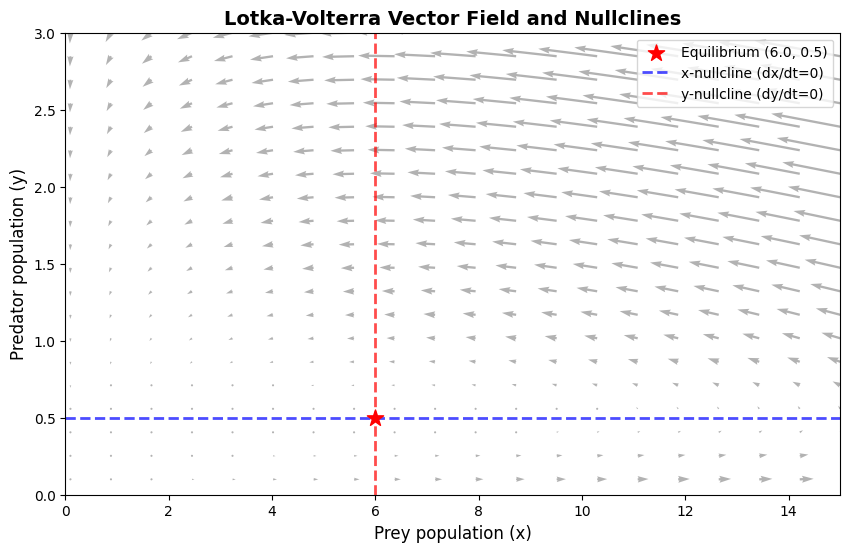


[Teaching points:]
- Arrows show the direction populations move
- Notice the circular pattern around the equilibrium
- Nullclines divide the plane into regions of different behavior
- Where nullclines intersect = equilibrium point


In [4]:
def plot_vector_field(gamma=0.1, beta=0.2, delta=0.05, alpha=0.3):
    """
    Plot the direction field for the Lotka-Volterra system.
    Shows how the system evolves from any initial condition.
    """
    # Create a grid of points
    x = linspace(0.1, 15, 20)  # Prey population range
    y = linspace(0.1, 3, 20)   # Predator population range
    X, Y = meshgrid(x, y)
    
    # Calculate derivatives at each grid point
    U = prey_equation(X, Y, gamma, beta)         # dx/dt at each point
    V = predator_equation(X, Y, delta, alpha)    # dy/dt at each point
    
    # Create the plot
    figure(figsize=(10, 6))
    quiver(X, Y, U, V, alpha=0.6, color='gray')
    
    # Mark the equilibrium point
    x_star, y_star = equilibrium_points(gamma, beta, delta, alpha)
    scatter([x_star], [y_star], c='red', s=150, marker='*', 
            label=f'Equilibrium ({x_star:.1f}, {y_star:.1f})', zorder=5)
    
    # Add nullclines (where derivatives are zero)
    # x-nullcline: dx/dt = 0 => y = gamma/beta (horizontal line)
    plot([0, 15], [y_star, y_star], 'b--', linewidth=2, alpha=0.7, label='x-nullcline (dx/dt=0)')
    # y-nullcline: dy/dt = 0 => x = alpha/delta (vertical line)
    plot([x_star, x_star], [0, 3], 'r--', linewidth=2, alpha=0.7, label='y-nullcline (dy/dt=0)')
    
    xlabel('Prey population (x)', fontsize=12)
    ylabel('Predator population (y)', fontsize=12)
    title('Lotka-Volterra Vector Field and Nullclines', fontsize=14, fontweight='bold')
    legend(loc='upper right')
    xlim(0, 15)
    ylim(0, 3)
    show()


plot_vector_field()

print("\n[Teaching points:]")
print("- Arrows show the direction populations move")
print("- Notice the circular pattern around the equilibrium")
print("- Nullclines divide the plane into regions of different behavior")
print("- Where nullclines intersect = equilibrium point")

## 4. The RK4 Method: Numerical Integration

Now let's solve the system numerically using the **Fourth-Order Runge-Kutta (RK4)** method.

### Why RK4?

We need a numerical method because:
- The Lotka-Volterra equations have no closed-form analytical solution
- RK4 is the "gold standard" for ODE integration

**Advantages of RK4:**
1. **High accuracy**: Error is $O(h^4)$ where $h$ is the step size
2. **Good stability**: Works well for many types of ODEs
3. **Single-step method**: Only needs current point (not past history)
4. **Preserves structure**: Good at maintaining conservation laws

### The RK4 Algorithm

For a system $\frac{d\mathbf{y}}{dt} = \mathbf{f}(t, \mathbf{y})$, one RK4 step is:

$$
\begin{align}
\mathbf{k}_1 &= h \cdot \mathbf{f}(t_n, \mathbf{y}_n) \\
\mathbf{k}_2 &= h \cdot \mathbf{f}(t_n + h/2, \mathbf{y}_n + \mathbf{k}_1/2) \\
\mathbf{k}_3 &= h \cdot \mathbf{f}(t_n + h/2, \mathbf{y}_n + \mathbf{k}_2/2) \\
\mathbf{k}_4 &= h \cdot \mathbf{f}(t_n + h, \mathbf{y}_n + \mathbf{k}_3) \\
\mathbf{y}_{n+1} &= \mathbf{y}_n + \frac{1}{6}(\mathbf{k}_1 + 2\mathbf{k}_2 + 2\mathbf{k}_3 + \mathbf{k}_4)
\end{align}
$$

**Interpretation:**
- $\mathbf{k}_1$: Slope at the **beginning** of the interval
- $\mathbf{k}_2$: Slope at the **midpoint** using $\mathbf{k}_1$
- $\mathbf{k}_3$: Better slope at the **midpoint** using $\mathbf{k}_2$
- $\mathbf{k}_4$: Slope at the **end** of the interval
- Final step: **Weighted average** with more weight on midpoint estimates

**For our 2D system**, $\mathbf{y} = (x, y)$ and we apply RK4 to both components simultaneously.

In [7]:
def rk4_step(x, y, dt, gamma=0.1, beta=0.2, delta=0.05, alpha=0.3):
    """
    Perform one RK4 step for the Lotka-Volterra system.
    
    Parameters:
        x, y: Current prey and predator populations
        dt: Time step size
        gamma, beta, delta, alpha: Model parameters
    
    Returns:
        x_new, y_new: Populations after one time step
    """
    # #RK4 formula:
    # k1 = f(t, y)
    # k2 = f(t + dt/2, y + k1*dt/2)
    # k3 = f(t + dt/2, y + k2*dt/2)
    # k4 = f(t + dt, y + k3*dt)
    # y_new = y + (k1 + 2*k2 + 2*k3 + k4) * dt/6
    k1x = dt * prey_equation(x, y, gamma, beta)
    k1y = dt * predator_equation(x, y, delta, alpha)

    k2x = dt * prey_equation(x + k1x/2, y + k1y/2, gamma, beta)
    k2y = dt * predator_equation(x + k1x/2, y + k1y/2, delta, alpha)

    k3x = dt * prey_equation(x + k2x/2, y + k2y/2, gamma, beta)
    k3y = dt * predator_equation(x + k2x/2, y + k2y/2, delta, alpha)

    k4x = dt * prey_equation(x + k3x, y + k3y, gamma, beta)
    k4y = dt * predator_equation(x + k3x, y + k3y, delta, alpha)

    x_new = x + (k1x + 2*k2x + 2*k3x + k4x) / 6
    y_new = y + (k1y + 2*k2y + 2*k3y + k4y) / 6

    return x_new, y_new
print("RK4 step function implemented!")
print("This gives us 4th-order accuracy in time.")

RK4 step function implemented!
This gives us 4th-order accuracy in time.


### Creating the Complete Solver

Now let's create a function that applies RK4 repeatedly to solve over many time steps.

In [8]:
def solve_lotka_volterra(x0, y0, M, dt, gamma=0.1, beta=0.2, delta=0.05, alpha=0.3):
    """
    Solve the Lotka-Volterra system using RK4.
    
    Parameters:
        x0, y0: Initial populations (prey, predator)
        M: Number of time steps
        dt: Time step size
        gamma, beta, delta, alpha: Model parameters
    
    Returns:
        x, y: Arrays of length M+1 containing the solution trajectories
    """
    x = zeros(M + 1)
    y = zeros(M + 1)
    x[0] = x0
    y[0] = y0

    for i in range(M):
        x[i+1], y[i+1] = rk4_step(x[i], y[i], dt, gamma, beta, delta, alpha)

    return x, y
print("Complete solver ready!")
print("Now we can simulate population dynamics over time.")

Complete solver ready!
Now we can simulate population dynamics over time.


## 5. Phase Portrait: Visualizing Periodic Orbits

Now let's solve the system for several different initial conditions and plot the trajectories in the **phase plane**.

**What is a phase portrait?**
- Plot with prey on x-axis, predators on y-axis
- Each trajectory shows how populations co-evolve
- Time is implicit (not shown directly)

**What to expect:**
- **Closed orbits**: Trajectories form closed loops
- **Periodic behavior**: Populations cycle indefinitely
- **Amplitude matters**: Distance from equilibrium determines period
- **Conservation**: Each orbit has a constant energy-like quantity (first integral)

Simulating 4 different initial conditions...

  IC: (1.4, 0.8) - Small populations
  IC: (9.0, 1.5) - Many prey, some predators
  IC: (4.0, 0.5) - Medium prey, few predators
  IC: (6.0, 0.45) - Close to equilibrium


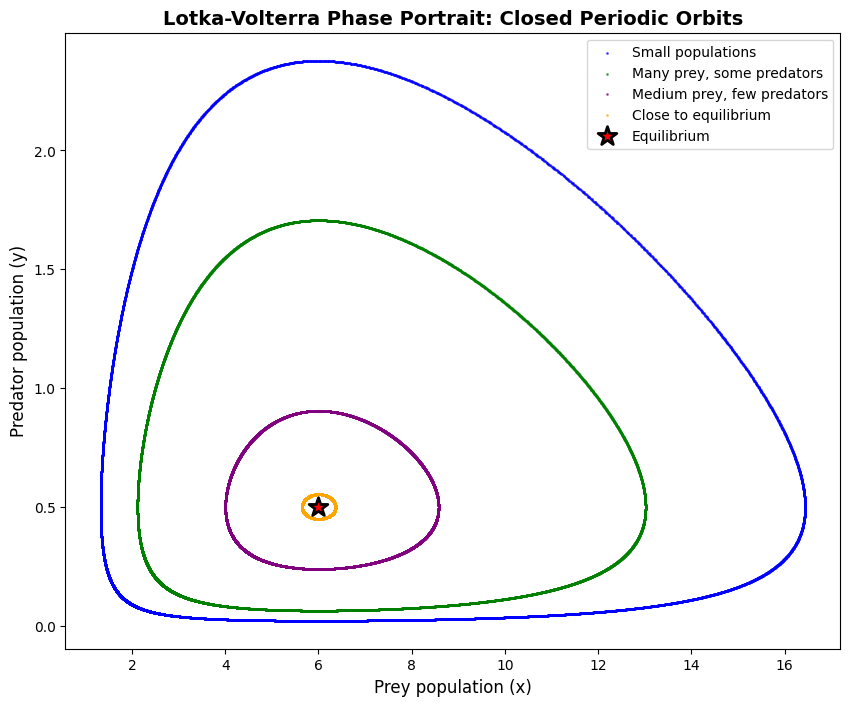


[Key observations:]
- All trajectories are CLOSED LOOPS → periodic behavior
- Larger loops = larger amplitude oscillations
- All orbits circle the equilibrium in the same direction (counterclockwise)
- The equilibrium is a CENTER (neutrally stable)


In [9]:
# Simulate multiple trajectories with different initial conditions
print("Simulating 4 different initial conditions...\n")

# Initial conditions: (prey, predator)
initial_conditions = [
    (1.4, 0.8, 'Small populations'),
    (9.0, 1.5, 'Many prey, some predators'),
    (4.0, 0.5, 'Medium prey, few predators'),
    (6.0, 0.45, 'Close to equilibrium')
]

# Solve for each initial condition
M = 10000  # Number of time steps
dt = 0.04  # Time step size

trajectories = []
for x0, y0, description in initial_conditions:
    x, y = solve_lotka_volterra(x0, y0, M, dt)
    trajectories.append((x, y, description))
    print(f"  IC: ({x0}, {y0}) - {description}")

# Plot phase portrait
figure(figsize=(10, 8))

colors = ['blue', 'green', 'purple', 'orange']
for i, (x, y, description) in enumerate(trajectories):
    scatter(x, y, s=1, alpha=0.6, c=colors[i], label=description)

# Mark the equilibrium
x_star, y_star = equilibrium_points()
scatter([x_star], [y_star], c='red', s=200, marker='*', 
        label='Equilibrium', zorder=5, edgecolors='black', linewidths=2)

xlabel('Prey population (x)', fontsize=12)
ylabel('Predator population (y)', fontsize=12)
title('Lotka-Volterra Phase Portrait: Closed Periodic Orbits', fontsize=14, fontweight='bold')
legend(loc='upper right')
show()

print("\n[Key observations:]")
print("- All trajectories are CLOSED LOOPS → periodic behavior")
print("- Larger loops = larger amplitude oscillations")
print("- All orbits circle the equilibrium in the same direction (counterclockwise)")
print("- The equilibrium is a CENTER (neutrally stable)")

## 6. Time Series: The Population Cycles

The phase portrait shows us the geometric structure, but let's also look at how populations change **over time**.

**What to look for:**
- **Periodic oscillations**: Both populations rise and fall repeatedly
- **Phase lag**: Predator peaks lag behind prey peaks (why?)
- **Ecological story**: 
  1. Many prey → predators thrive and increase
  2. Many predators → prey get eaten, population drops
  3. Few prey → predators starve, population drops
  4. Few predators → prey recover, population rises
  5. Repeat!

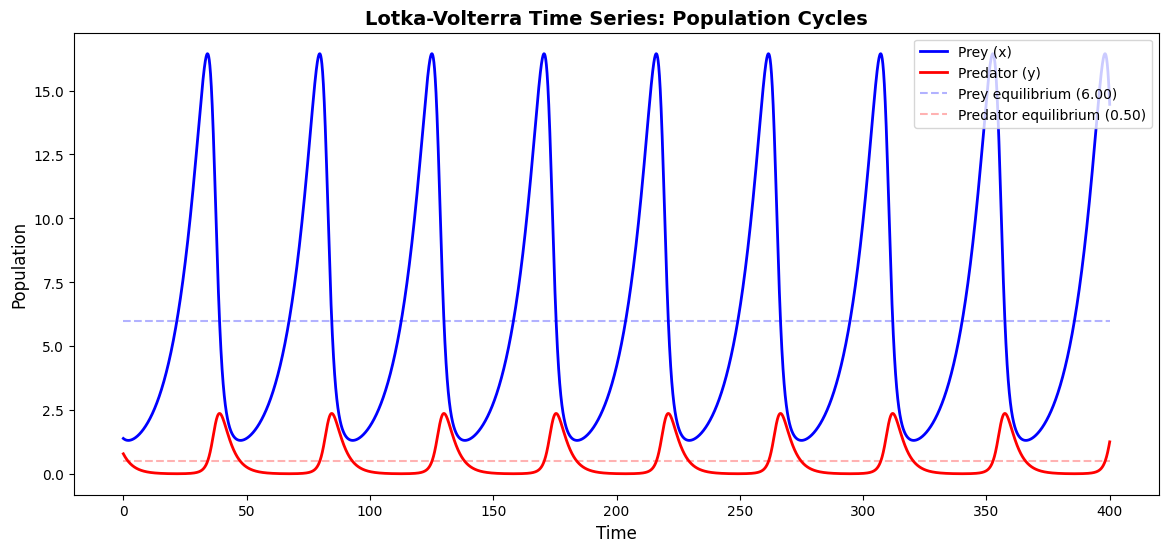


[Ecological interpretation:]
1. Prey population peaks first
2. Abundant prey allows predators to increase (with a delay)
3. High predation causes prey to decline
4. Fewer prey means predators starve and decline
5. With fewer predators, prey can recover
6. The cycle repeats indefinitely!

[This is why we see boom-and-bust cycles in nature]


In [10]:
# Use the first trajectory for time series plot
X, Y, _ = trajectories[0]

# Create time array
t = linspace(0, M * dt, M + 1)

# Plot both populations vs time
figure(figsize=(14, 6))

plot(t, X, label='Prey (x)', linewidth=2, color='blue')
plot(t, Y, label='Predator (y)', linewidth=2, color='red')

# Add horizontal lines at equilibrium values
x_star, y_star = equilibrium_points()
plot([t[0], t[-1]], [x_star, x_star], 'b--', alpha=0.3, label=f'Prey equilibrium ({x_star:.2f})')
plot([t[0], t[-1]], [y_star, y_star], 'r--', alpha=0.3, label=f'Predator equilibrium ({y_star:.2f})')

xlabel('Time', fontsize=12)
ylabel('Population', fontsize=12)
title('Lotka-Volterra Time Series: Population Cycles', fontsize=14, fontweight='bold')
legend(loc='upper right')
show()

print("\n[Ecological interpretation:]")
print("1. Prey population peaks first")
print("2. Abundant prey allows predators to increase (with a delay)")
print("3. High predation causes prey to decline")
print("4. Fewer prey means predators starve and decline")
print("5. With fewer predators, prey can recover")
print("6. The cycle repeats indefinitely!")
print("\n[This is why we see boom-and-bust cycles in nature]")

## 7. Conservation Law: The First Integral

The Lotka-Volterra system has a remarkable property: it conserves a quantity called the **first integral** or **Hamiltonian**.

### Mathematical Derivation:

Define:
$$H(x, y) = \delta x - \alpha \ln(x) + \beta y - \gamma \ln(y)$$

Taking the derivative along trajectories:
$$\frac{dH}{dt} = \frac{\partial H}{\partial x}\frac{dx}{dt} + \frac{\partial H}{\partial y}\frac{dy}{dt}$$

After substitution and simplification (try it!), we get:
$$\frac{dH}{dt} = 0$$

**This means:** $H$ is constant along each trajectory!

**Implications:**
- Each initial condition has a specific value of $H$
- Trajectories are level curves of $H(x, y)$
- This is why orbits are closed!
- Good numerical methods should preserve $H$ (up to rounding errors)

**Let's check if RK4 preserves conservation:**

Conservation Check:
Initial H value: 0.151373
Final H value:   0.151373
Minimum H:       0.151373
Maximum H:       0.151373

Relative variation: 0.000001%

[Result: RK4 preserves H to within 0.0000%]
[This is excellent! The conservation law is well maintained.]


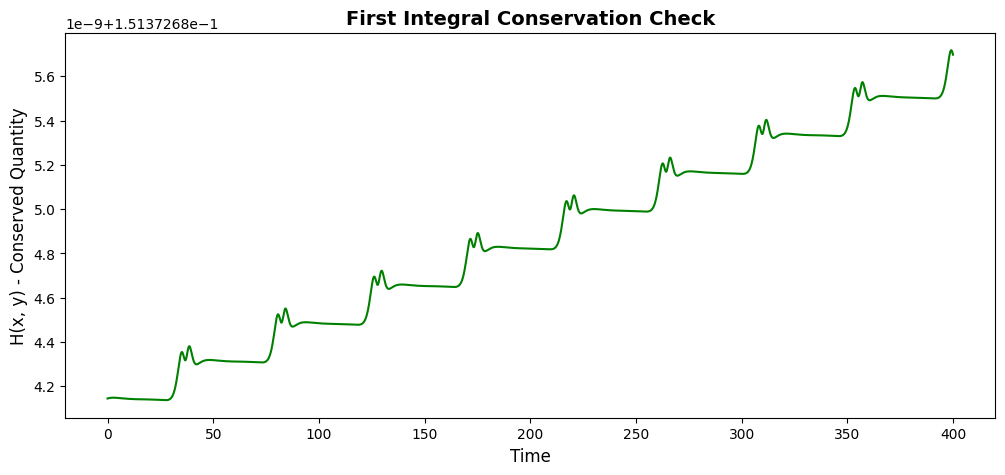


[The nearly constant H confirms our numerical solution is accurate!]


In [11]:
def conserved_quantity(x, y, gamma=0.1, beta=0.2, delta=0.05, alpha=0.3):
    """
    Calculate the first integral (conserved quantity) of the Lotka-Volterra system.

    H(x, y) = δx - α*ln(x) + βy - γ*ln(y)

    This should be constant along trajectories (conservation law).
    """
    return delta * x - alpha * log(x) + beta * y - gamma * log(y)


# Check conservation for our first trajectory
X, Y, _ = trajectories[0]

H = conserved_quantity(X, Y)

# Calculate how much H varies (should be very small)
H_initial = H[0]
H_variation = (H.max() - H.min()) / abs(H.mean())

print("Conservation Check:")
print("="*50)
print(f"Initial H value: {H_initial:.6f}")
print(f"Final H value:   {H[-1]:.6f}")
print(f"Minimum H:       {H.min():.6f}")
print(f"Maximum H:       {H.max():.6f}")
print(f"\nRelative variation: {H_variation * 100:.6f}%")
print(f"\n[Result: RK4 preserves H to within {H_variation*100:.4f}%]")
print(f"[This is excellent! The conservation law is well maintained.]")

# Plot H over time to visualize conservation
figure(figsize=(12, 5))
plot(t, H, linewidth=1.5, color='green')
xlabel('Time', fontsize=12)
ylabel('H(x, y) - Conserved Quantity', fontsize=12)
title('First Integral Conservation Check', fontsize=14, fontweight='bold')
show()

print("\n[The nearly constant H confirms our numerical solution is accurate!]")

## 8. Exploring Different Initial Conditions

Let's create one more visualization showing how the period of oscillation depends on the initial condition.

**Key point:** The closer you start to the equilibrium, the smaller the amplitude and the shorter the period.

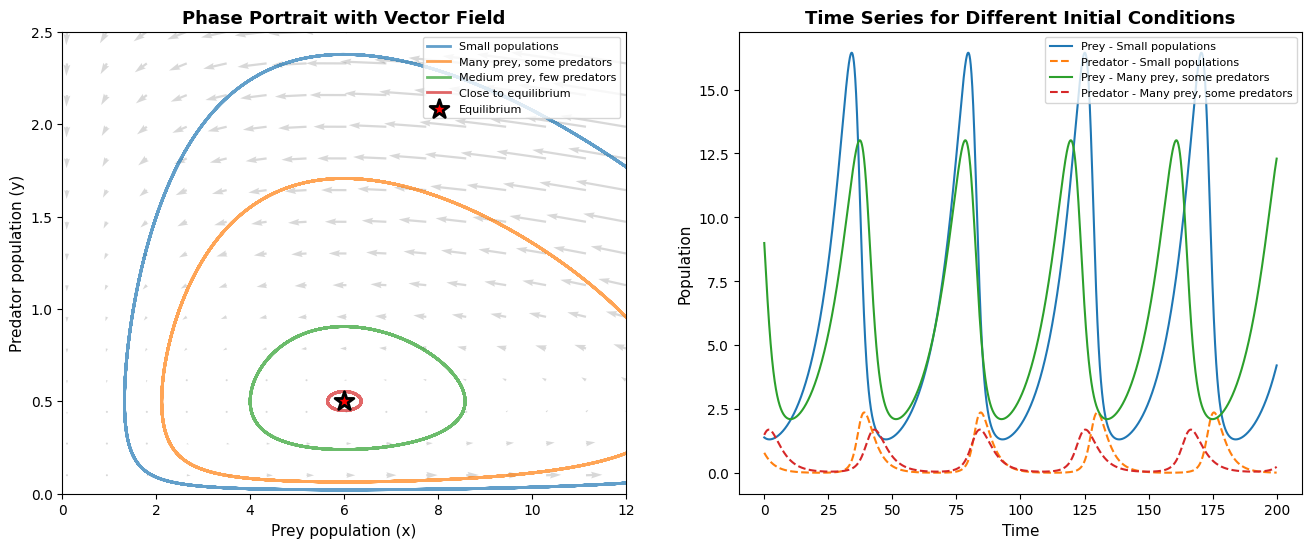


[Notice: Different initial conditions give different periods and amplitudes]
[But all exhibit the same qualitative behavior: periodic oscillations]


In [12]:
# Create a combined visualization
fig = figure(figsize=(16, 6))

# Subplot 1: Phase portrait with vector field
ax1 = subplot(1, 2, 1)
x_grid = linspace(0.1, 12, 15)
y_grid = linspace(0.1, 2.5, 15)
X_grid, Y_grid = meshgrid(x_grid, y_grid)
U = prey_equation(X_grid, Y_grid)
V = predator_equation(X_grid, Y_grid)
ax1.quiver(X_grid, Y_grid, U, V, alpha=0.3, color='gray')

# Plot trajectories
for i, (x, y, description) in enumerate(trajectories):
    ax1.plot(x, y, linewidth=2, alpha=0.7, label=description)

x_star, y_star = equilibrium_points()
ax1.scatter([x_star], [y_star], c='red', s=200, marker='*', 
           label='Equilibrium', zorder=5, edgecolors='black', linewidths=2)
ax1.set_xlabel('Prey population (x)', fontsize=11)
ax1.set_ylabel('Predator population (y)', fontsize=11)
ax1.set_title('Phase Portrait with Vector Field', fontsize=13, fontweight='bold')
ax1.legend(fontsize=8, loc='upper right')
ax1.set_xlim(0, 12)
ax1.set_ylim(0, 2.5)

# Subplot 2: Multiple time series
ax2 = subplot(1, 2, 2)
t_plot = linspace(0, 200, 5001)  # First 200 time units
for i, (x, y, description) in enumerate(trajectories[:2]):  # Just show 2 for clarity
    ax2.plot(t_plot, x[:5001], linewidth=1.5, label=f'Prey - {description}', linestyle='-')
    ax2.plot(t_plot, y[:5001], linewidth=1.5, label=f'Predator - {description}', linestyle='--')

ax2.set_xlabel('Time', fontsize=11)
ax2.set_ylabel('Population', fontsize=11)
ax2.set_title('Time Series for Different Initial Conditions', fontsize=13, fontweight='bold')
ax2.legend(fontsize=8, loc='upper right')

show()

print("\n[Notice: Different initial conditions give different periods and amplitudes]")
print("[But all exhibit the same qualitative behavior: periodic oscillations]")

## 9. Summary and Key Takeaways

Excellent work! Let's summarize what we've learned about the Lotka-Volterra predator-prey model.

### Mathematical Concepts:

1. **System of coupled nonlinear ODEs**
   - Prey: $\frac{dx}{dt} = \gamma x - \beta xy$
   - Predator: $\frac{dy}{dt} = \delta xy - \alpha y$
   - Nonlinearity comes from interaction term $xy$

2. **Equilibrium Analysis**
   - Extinction: $(0, 0)$ - saddle point
   - Coexistence: $(\alpha/\delta, \gamma/\beta)$ - center (neutrally stable)

3. **Conservation Law**
   - First integral: $H(x,y) = \delta x - \alpha\ln(x) + \beta y - \gamma\ln(y)$
   - Conserved along trajectories
   - Explains why orbits are closed

### Numerical Methods:

1. **RK4 Integration**
   - Fourth-order accurate: $O(h^4)$ global error
   - Excellent at preserving conservation laws
   - Well-suited for oscillatory systems

2. **Step Size Selection**
   - $dt = 0.04$ is small enough for accuracy
   - Check conservation to verify accuracy

### Ecological Insights:

1. **Population Cycles**
   - Predator-prey interactions create oscillations
   - Predator peaks lag behind prey peaks
   - Period depends on initial conditions

2. **Real-World Examples**
   - Lynx and snowshoe hare in Canada
   - Fox and rabbit populations
   - Fish populations in the Adriatic Sea (Volterra's original motivation)

3. **Model Limitations**
   - Assumes unlimited prey resources (exponential growth)
   - No environmental carrying capacity
   - No spatial structure or migration
   - Neutrally stable (real ecosystems have damping)

### Extensions to Consider:

1. **Realistic Modifications:**
   - Add logistic growth for prey: $\gamma x(1 - x/K)$
   - Include predator satiation (functional response)
   - Add stochastic fluctuations

2. **Mathematical Questions:**
   - How do parameter changes affect dynamics?
   - Can we have stable equilibria with modifications?
   - What happens with three species?

---

### Discussion Questions:

1. Why do real ecosystems not oscillate forever like this model predicts?
2. How would you modify the model to include environmental carrying capacity?
3. What happens if we add a second predator species?
4. Can you think of non-ecological systems with similar dynamics?

---

**Congratulations! You now understand the classic Lotka-Volterra model!** 🦊🐰

This model is the foundation for much of mathematical ecology and has applications far beyond biology!